# d - pgdl - empirical - geomech - tf

Empirical d-pgdl (F1 using transformer) with simulated dataset - Geomechanics

In [1]:
import random
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":14,"axes.labelsize":14})   

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm
from matplotlib.colors import Normalize

import dataloader
import util
import fcnn_d_emp_tf

In [2]:
Bakken = dataloader.DataLoader(dataset_type="GEOMECH", verbose=False)
x, y, y_masked, c = Bakken.generate_data(seed=12, simulate_field=True)

x = np.expand_dims(x, axis=-1)

print(x.shape, y.shape, y_masked.shape, c.shape)

(800, 7, 1) (800, 60, 3) (800, 60, 3) (800, 60, 3)


In [3]:
def toggle_nan(data_):
    data = np.copy(data_)
    if np.isnan(np.sum(data)):
        data[np.isnan(data) == True] = -1
    else:
        data[data == -1] = np.nan
    return data

In [4]:
#assign -1 to masked values (in practice this will be Nan, but cannot be handled during training)
y_masked = toggle_nan(y_masked)

In [5]:
#get train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test, y_masked_train, y_masked_test, c_train, c_test = train_test_split(x, y, y_masked, c, random_state=88, test_size=0.2, shuffle=False)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)
print(y_masked_train.shape, y_masked_test.shape)
print(c_train.shape, c_test.shape)

#augment mask with output
y_and_mask_train = np.concatenate((y_masked_train, c_train), axis=1)
y_and_mask_test = np.concatenate((y_masked_test, c_test), axis=1)
print(y_and_mask_train.shape, y_and_mask_test.shape)

(640, 7, 1) (160, 7, 1)
(640, 60, 3) (160, 60, 3)
(640, 60, 3) (160, 60, 3)
(640, 60, 3) (160, 60, 3)
(640, 120, 3) (160, 120, 3)


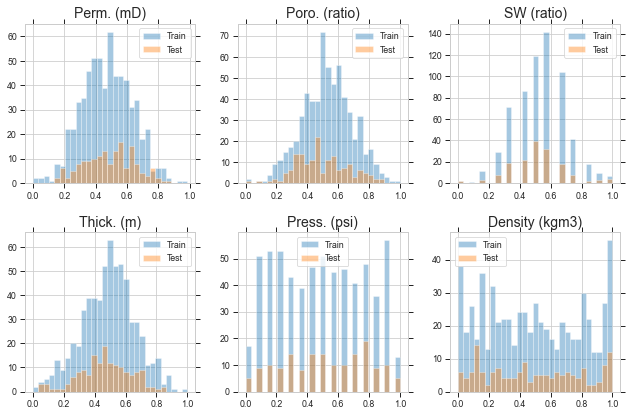

In [6]:
#display the input data
dataloader.histplot(x_train, x_test, name="sim-x-geo")

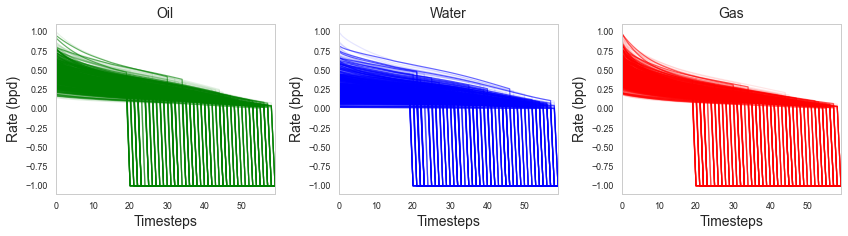

In [7]:
dataloader.plot_production(y_masked_train, y_masked_test, name="sim-y-geomech")

In [9]:
model = fcnn_d_emp_tf.FCNN(x_train, y_masked_train, y_and_mask_train, n_P=3, name="d-pgdl-emp-sim")
model.train(n_batch=10, nb_epoch=500, load=False)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(10, 7, 1)]         0                                            
__________________________________________________________________________________________________
layer_normalization_4 (LayerNor (10, 7, 1)           2           input_2[0][0]                    
__________________________________________________________________________________________________
multi_head_attention_2 (MultiHe ((10, 7, 1), (10, 16 113         layer_normalization_4[0][0]      
                                                                 layer_normalization_4[0][0]      
__________________________________________________________________________________________________
dropout_2 (Dropout)             (10, 7, 1)           0           multi_head_attention_2[0][0

  0%|                                                | 1/500 [00:04<40:28,  4.87s/it]

0 [Loss: 0.375048] [Val loss: 0.375048]


  0%|▏                                               | 2/500 [00:05<28:58,  3.49s/it]

1 [Loss: 0.372176] [Val loss: 0.372176]


  1%|▎                                               | 3/500 [00:05<21:02,  2.54s/it]

2 [Loss: 0.360125] [Val loss: 0.360125]


  1%|▍                                               | 4/500 [00:05<15:29,  1.87s/it]

3 [Loss: 0.350331] [Val loss: 0.350331]


  1%|▍                                               | 5/500 [00:06<11:42,  1.42s/it]

4 [Loss: 0.347511] [Val loss: 0.347511]


  1%|▌                                               | 6/500 [00:06<08:58,  1.09s/it]

5 [Loss: 0.346567] [Val loss: 0.346567]


  1%|▋                                               | 7/500 [00:06<07:01,  1.17it/s]

6 [Loss: 0.346208] [Val loss: 0.346208]


  2%|▊                                               | 8/500 [00:07<05:39,  1.45it/s]

7 [Loss: 0.345991] [Val loss: 0.345991]


  2%|▊                                               | 9/500 [00:07<04:41,  1.75it/s]

8 [Loss: 0.345831] [Val loss: 0.345831]


  2%|▉                                              | 10/500 [00:07<04:01,  2.03it/s]

9 [Loss: 0.345684] [Val loss: 0.345684]


  2%|█                                              | 11/500 [00:08<03:40,  2.22it/s]

10 [Loss: 0.345548] [Val loss: 0.345548]


  2%|█▏                                             | 12/500 [00:08<03:53,  2.09it/s]

11 [Loss: 0.345416] [Val loss: 0.345416]


  3%|█▏                                             | 13/500 [00:08<03:33,  2.29it/s]

12 [Loss: 0.345296] [Val loss: 0.345296]


  3%|█▎                                             | 14/500 [00:09<03:13,  2.51it/s]

13 [Loss: 0.345180] [Val loss: 0.345180]


  3%|█▍                                             | 15/500 [00:09<03:01,  2.67it/s]

14 [Loss: 0.345057] [Val loss: 0.345057]


  3%|█▌                                             | 16/500 [00:09<02:54,  2.78it/s]

15 [Loss: 0.344943] [Val loss: 0.344943]


  3%|█▌                                             | 17/500 [00:10<02:47,  2.88it/s]

16 [Loss: 0.344838] [Val loss: 0.344838]


  4%|█▋                                             | 18/500 [00:10<02:48,  2.86it/s]

17 [Loss: 0.344734] [Val loss: 0.344734]


  4%|█▊                                             | 19/500 [00:10<02:47,  2.87it/s]

18 [Loss: 0.344626] [Val loss: 0.344626]


  4%|█▉                                             | 20/500 [00:11<02:46,  2.88it/s]

19 [Loss: 0.344518] [Val loss: 0.344518]


  4%|█▉                                             | 21/500 [00:11<02:45,  2.89it/s]

20 [Loss: 0.344394] [Val loss: 0.344394]


  4%|██                                             | 22/500 [00:11<02:45,  2.88it/s]

21 [Loss: 0.344311] [Val loss: 0.344311]


  5%|██▏                                            | 23/500 [00:12<02:43,  2.92it/s]

22 [Loss: 0.344199] [Val loss: 0.344199]


  5%|██▎                                            | 24/500 [00:12<02:40,  2.96it/s]

23 [Loss: 0.344111] [Val loss: 0.344111]


  5%|██▎                                            | 25/500 [00:12<02:37,  3.02it/s]

24 [Loss: 0.344018] [Val loss: 0.344018]


  5%|██▍                                            | 26/500 [00:13<02:39,  2.98it/s]

25 [Loss: 0.343917] [Val loss: 0.343917]


  5%|██▌                                            | 27/500 [00:13<02:40,  2.95it/s]

26 [Loss: 0.343821] [Val loss: 0.343821]


  6%|██▋                                            | 28/500 [00:13<02:42,  2.90it/s]

27 [Loss: 0.343723] [Val loss: 0.343723]


  6%|██▋                                            | 29/500 [00:14<02:45,  2.84it/s]

28 [Loss: 0.343641] [Val loss: 0.343641]


  6%|██▊                                            | 30/500 [00:14<02:48,  2.80it/s]

29 [Loss: 0.343548] [Val loss: 0.343548]


  6%|██▉                                            | 31/500 [00:15<02:49,  2.77it/s]

30 [Loss: 0.343462] [Val loss: 0.343462]


  6%|███                                            | 32/500 [00:15<02:52,  2.71it/s]

31 [Loss: 0.343383] [Val loss: 0.343383]


  7%|███                                            | 33/500 [00:15<02:55,  2.66it/s]

32 [Loss: 0.343309] [Val loss: 0.343309]


  7%|███▏                                           | 34/500 [00:16<03:01,  2.57it/s]

33 [Loss: 0.343237] [Val loss: 0.343237]


  7%|███▎                                           | 35/500 [00:16<02:56,  2.64it/s]

34 [Loss: 0.343151] [Val loss: 0.343151]


  7%|███▍                                           | 36/500 [00:16<02:46,  2.79it/s]

35 [Loss: 0.343086] [Val loss: 0.343086]


  7%|███▍                                           | 37/500 [00:17<02:41,  2.87it/s]

36 [Loss: 0.343023] [Val loss: 0.343023]


  8%|███▌                                           | 38/500 [00:17<02:38,  2.91it/s]

37 [Loss: 0.342958] [Val loss: 0.342958]


  8%|███▋                                           | 39/500 [00:17<02:38,  2.91it/s]

38 [Loss: 0.342892] [Val loss: 0.342892]


  8%|███▊                                           | 40/500 [00:18<02:34,  2.98it/s]

39 [Loss: 0.342833] [Val loss: 0.342833]


  8%|███▊                                           | 41/500 [00:18<02:33,  2.98it/s]

40 [Loss: 0.342775] [Val loss: 0.342775]


  8%|███▉                                           | 42/500 [00:18<02:28,  3.08it/s]

41 [Loss: 0.342702] [Val loss: 0.342702]


  9%|████                                           | 43/500 [00:19<02:35,  2.94it/s]

42 [Loss: 0.342623] [Val loss: 0.342623]


  9%|████▏                                          | 44/500 [00:19<02:33,  2.98it/s]

43 [Loss: 0.342563] [Val loss: 0.342563]


  9%|████▏                                          | 45/500 [00:19<02:29,  3.04it/s]

44 [Loss: 0.342520] [Val loss: 0.342520]


  9%|████▎                                          | 46/500 [00:20<02:25,  3.11it/s]

45 [Loss: 0.342482] [Val loss: 0.342482]


  9%|████▍                                          | 47/500 [00:20<02:25,  3.12it/s]

46 [Loss: 0.342437] [Val loss: 0.342437]


 10%|████▌                                          | 48/500 [00:20<02:22,  3.16it/s]

47 [Loss: 0.342406] [Val loss: 0.342406]


 10%|████▌                                          | 49/500 [00:21<02:23,  3.14it/s]

48 [Loss: 0.342368] [Val loss: 0.342368]


 10%|████▋                                          | 50/500 [00:21<02:26,  3.07it/s]

49 [Loss: 0.342338] [Val loss: 0.342338]


 10%|████▊                                          | 51/500 [00:21<02:28,  3.03it/s]

50 [Loss: 0.342300] [Val loss: 0.342300]


 10%|████▉                                          | 52/500 [00:22<02:26,  3.05it/s]

51 [Loss: 0.342273] [Val loss: 0.342273]


 11%|████▉                                          | 53/500 [00:22<02:26,  3.05it/s]

52 [Loss: 0.342238] [Val loss: 0.342238]


 11%|█████                                          | 54/500 [00:22<02:24,  3.09it/s]

53 [Loss: 0.342202] [Val loss: 0.342202]


 11%|█████▏                                         | 55/500 [00:23<02:23,  3.11it/s]

54 [Loss: 0.342169] [Val loss: 0.342169]


 11%|█████▎                                         | 56/500 [00:23<02:23,  3.09it/s]

55 [Loss: 0.342133] [Val loss: 0.342133]


 11%|█████▎                                         | 57/500 [00:23<02:21,  3.13it/s]

56 [Loss: 0.342105] [Val loss: 0.342105]


 12%|█████▍                                         | 58/500 [00:24<02:19,  3.16it/s]

57 [Loss: 0.342067] [Val loss: 0.342067]


 12%|█████▌                                         | 59/500 [00:24<02:20,  3.13it/s]

58 [Loss: 0.342035] [Val loss: 0.342035]


 12%|█████▋                                         | 60/500 [00:24<02:20,  3.13it/s]

59 [Loss: 0.342003] [Val loss: 0.342003]


 12%|█████▋                                         | 61/500 [00:25<02:18,  3.17it/s]

60 [Loss: 0.341970] [Val loss: 0.341970]


 12%|█████▊                                         | 62/500 [00:25<02:17,  3.18it/s]

61 [Loss: 0.341934] [Val loss: 0.341934]


 13%|█████▉                                         | 63/500 [00:25<02:17,  3.18it/s]

62 [Loss: 0.341908] [Val loss: 0.341908]


 13%|██████                                         | 64/500 [00:25<02:17,  3.16it/s]

63 [Loss: 0.341878] [Val loss: 0.341878]


 13%|██████                                         | 65/500 [00:26<02:20,  3.09it/s]

64 [Loss: 0.341847] [Val loss: 0.341847]


 13%|██████▏                                        | 66/500 [00:26<02:21,  3.07it/s]

65 [Loss: 0.341823] [Val loss: 0.341823]


 13%|██████▎                                        | 67/500 [00:26<02:21,  3.05it/s]

66 [Loss: 0.341792] [Val loss: 0.341792]


 14%|██████▍                                        | 68/500 [00:27<02:22,  3.04it/s]

67 [Loss: 0.341767] [Val loss: 0.341767]


 14%|██████▍                                        | 69/500 [00:27<02:50,  2.53it/s]

68 [Loss: 0.341737] [Val loss: 0.341737]


 14%|██████▌                                        | 70/500 [00:28<02:40,  2.68it/s]

69 [Loss: 0.341716] [Val loss: 0.341716]


 14%|██████▋                                        | 71/500 [00:28<02:34,  2.77it/s]

70 [Loss: 0.341690] [Val loss: 0.341690]


 14%|██████▊                                        | 72/500 [00:28<02:30,  2.85it/s]

71 [Loss: 0.341671] [Val loss: 0.341671]


 15%|██████▊                                        | 73/500 [00:29<02:30,  2.84it/s]

72 [Loss: 0.341653] [Val loss: 0.341653]


 15%|██████▉                                        | 74/500 [00:29<02:29,  2.86it/s]

73 [Loss: 0.341633] [Val loss: 0.341633]


 15%|███████                                        | 75/500 [00:29<02:29,  2.85it/s]

74 [Loss: 0.341612] [Val loss: 0.341612]


 15%|███████▏                                       | 76/500 [00:30<02:28,  2.86it/s]

75 [Loss: 0.341595] [Val loss: 0.341595]


 15%|███████▏                                       | 77/500 [00:30<02:28,  2.85it/s]

76 [Loss: 0.341577] [Val loss: 0.341577]


 16%|███████▎                                       | 78/500 [00:30<02:27,  2.86it/s]

77 [Loss: 0.341560] [Val loss: 0.341560]


 16%|███████▍                                       | 79/500 [00:31<02:24,  2.91it/s]

78 [Loss: 0.341547] [Val loss: 0.341547]


 16%|███████▌                                       | 80/500 [00:31<02:22,  2.95it/s]

79 [Loss: 0.341529] [Val loss: 0.341529]


 16%|███████▌                                       | 81/500 [00:31<02:23,  2.92it/s]

80 [Loss: 0.341519] [Val loss: 0.341519]


 16%|███████▋                                       | 82/500 [00:32<02:22,  2.94it/s]

81 [Loss: 0.341501] [Val loss: 0.341501]


 17%|███████▊                                       | 83/500 [00:32<02:24,  2.88it/s]

82 [Loss: 0.341488] [Val loss: 0.341488]


 17%|███████▉                                       | 84/500 [00:33<02:27,  2.82it/s]

83 [Loss: 0.341475] [Val loss: 0.341475]


 17%|███████▉                                       | 85/500 [00:33<02:25,  2.86it/s]

84 [Loss: 0.341464] [Val loss: 0.341464]


 17%|████████                                       | 86/500 [00:33<02:25,  2.85it/s]

85 [Loss: 0.341446] [Val loss: 0.341446]


 17%|████████▏                                      | 87/500 [00:34<02:24,  2.85it/s]

86 [Loss: 0.341438] [Val loss: 0.341438]


 18%|████████▎                                      | 88/500 [00:34<02:23,  2.87it/s]

87 [Loss: 0.341424] [Val loss: 0.341424]


 18%|████████▎                                      | 89/500 [00:34<02:22,  2.89it/s]

88 [Loss: 0.341414] [Val loss: 0.341414]


 18%|████████▍                                      | 90/500 [00:35<02:19,  2.94it/s]

89 [Loss: 0.341407] [Val loss: 0.341407]


 18%|████████▌                                      | 91/500 [00:35<02:18,  2.95it/s]

90 [Loss: 0.341395] [Val loss: 0.341395]


 18%|████████▋                                      | 92/500 [00:35<02:17,  2.96it/s]

91 [Loss: 0.341383] [Val loss: 0.341383]


 19%|████████▋                                      | 93/500 [00:36<02:21,  2.88it/s]

92 [Loss: 0.341376] [Val loss: 0.341376]


 19%|████████▊                                      | 94/500 [00:36<02:21,  2.88it/s]

93 [Loss: 0.341366] [Val loss: 0.341366]


 19%|████████▉                                      | 95/500 [00:36<02:18,  2.92it/s]

94 [Loss: 0.341355] [Val loss: 0.341355]


 19%|█████████                                      | 96/500 [00:37<02:16,  2.96it/s]

95 [Loss: 0.341348] [Val loss: 0.341348]


 19%|█████████                                      | 97/500 [00:37<02:16,  2.96it/s]

96 [Loss: 0.341338] [Val loss: 0.341338]


 20%|█████████▏                                     | 98/500 [00:37<02:15,  2.97it/s]

97 [Loss: 0.341329] [Val loss: 0.341329]


 20%|█████████▎                                     | 99/500 [00:38<02:17,  2.92it/s]

98 [Loss: 0.341323] [Val loss: 0.341323]


 20%|█████████▏                                    | 100/500 [00:38<02:15,  2.94it/s]

99 [Loss: 0.341317] [Val loss: 0.341317]


 20%|█████████▎                                    | 101/500 [00:38<02:14,  2.96it/s]

100 [Loss: 0.341307] [Val loss: 0.341307]


 20%|█████████▍                                    | 102/500 [00:39<02:13,  2.98it/s]

101 [Loss: 0.341299] [Val loss: 0.341299]


 21%|█████████▍                                    | 103/500 [00:39<02:11,  3.01it/s]

102 [Loss: 0.341293] [Val loss: 0.341293]


 21%|█████████▌                                    | 104/500 [00:39<02:10,  3.04it/s]

103 [Loss: 0.341287] [Val loss: 0.341287]


 21%|█████████▋                                    | 105/500 [00:40<02:11,  2.99it/s]

104 [Loss: 0.341280] [Val loss: 0.341280]


 21%|█████████▊                                    | 106/500 [00:40<02:13,  2.94it/s]

105 [Loss: 0.341274] [Val loss: 0.341274]


 21%|█████████▊                                    | 107/500 [00:40<02:12,  2.97it/s]

106 [Loss: 0.341269] [Val loss: 0.341269]


 22%|█████████▉                                    | 108/500 [00:41<02:10,  3.01it/s]

107 [Loss: 0.341263] [Val loss: 0.341263]


 22%|██████████                                    | 109/500 [00:41<02:11,  2.97it/s]

108 [Loss: 0.341256] [Val loss: 0.341256]


 22%|██████████                                    | 110/500 [00:41<02:10,  2.99it/s]

109 [Loss: 0.341251] [Val loss: 0.341251]


 22%|██████████▏                                   | 111/500 [00:42<02:09,  3.00it/s]

110 [Loss: 0.341246] [Val loss: 0.341246]


 22%|██████████▎                                   | 112/500 [00:42<02:10,  2.97it/s]

111 [Loss: 0.341238] [Val loss: 0.341238]


 23%|██████████▍                                   | 113/500 [00:42<02:11,  2.94it/s]

112 [Loss: 0.341233] [Val loss: 0.341233]


 23%|██████████▍                                   | 114/500 [00:43<02:09,  2.98it/s]

113 [Loss: 0.341227] [Val loss: 0.341227]


 23%|██████████▌                                   | 115/500 [00:43<02:16,  2.82it/s]

114 [Loss: 0.341224] [Val loss: 0.341224]


 23%|██████████▋                                   | 116/500 [00:43<02:24,  2.67it/s]

115 [Loss: 0.341219] [Val loss: 0.341219]


 23%|██████████▊                                   | 117/500 [00:44<02:31,  2.53it/s]

116 [Loss: 0.341214] [Val loss: 0.341214]


 24%|██████████▊                                   | 118/500 [00:44<02:31,  2.53it/s]

117 [Loss: 0.341209] [Val loss: 0.341209]


 24%|██████████▉                                   | 119/500 [00:45<02:23,  2.65it/s]

118 [Loss: 0.341204] [Val loss: 0.341204]


 24%|███████████                                   | 120/500 [00:45<02:20,  2.70it/s]

119 [Loss: 0.341199] [Val loss: 0.341199]


 24%|███████████▏                                  | 121/500 [00:45<02:16,  2.78it/s]

120 [Loss: 0.341193] [Val loss: 0.341193]


 24%|███████████▏                                  | 122/500 [00:46<02:12,  2.84it/s]

121 [Loss: 0.341192] [Val loss: 0.341192]


 25%|███████████▎                                  | 123/500 [00:46<02:14,  2.80it/s]

122 [Loss: 0.341187] [Val loss: 0.341187]


 25%|███████████▍                                  | 124/500 [00:46<02:12,  2.84it/s]

123 [Loss: 0.341182] [Val loss: 0.341182]


 25%|███████████▌                                  | 125/500 [00:47<02:09,  2.90it/s]

124 [Loss: 0.341178] [Val loss: 0.341178]


 25%|███████████▌                                  | 126/500 [00:47<02:07,  2.92it/s]

125 [Loss: 0.341173] [Val loss: 0.341173]


 25%|███████████▋                                  | 127/500 [00:47<02:05,  2.97it/s]

126 [Loss: 0.341168] [Val loss: 0.341168]


 26%|███████████▊                                  | 128/500 [00:48<02:04,  2.99it/s]

127 [Loss: 0.341167] [Val loss: 0.341167]


 26%|███████████▊                                  | 129/500 [00:48<02:05,  2.96it/s]

128 [Loss: 0.341164] [Val loss: 0.341164]


 26%|███████████▉                                  | 130/500 [00:48<02:04,  2.97it/s]

129 [Loss: 0.341159] [Val loss: 0.341159]


 26%|████████████                                  | 131/500 [00:49<02:02,  3.00it/s]

130 [Loss: 0.341156] [Val loss: 0.341156]


 26%|████████████▏                                 | 132/500 [00:49<02:03,  2.98it/s]

131 [Loss: 0.341150] [Val loss: 0.341150]


 27%|████████████▏                                 | 133/500 [00:49<02:03,  2.98it/s]

132 [Loss: 0.341147] [Val loss: 0.341147]


 27%|████████████▎                                 | 134/500 [00:50<02:03,  2.97it/s]

133 [Loss: 0.341144] [Val loss: 0.341144]


 27%|████████████▍                                 | 135/500 [00:50<02:02,  2.97it/s]

134 [Loss: 0.341142] [Val loss: 0.341142]


 27%|████████████▌                                 | 136/500 [00:50<02:04,  2.93it/s]

135 [Loss: 0.341138] [Val loss: 0.341138]


 27%|████████████▌                                 | 137/500 [00:51<02:02,  2.95it/s]

136 [Loss: 0.341136] [Val loss: 0.341136]


 28%|████████████▋                                 | 138/500 [00:51<02:03,  2.93it/s]

137 [Loss: 0.341132] [Val loss: 0.341132]


 28%|████████████▊                                 | 139/500 [00:51<02:01,  2.96it/s]

138 [Loss: 0.341127] [Val loss: 0.341127]


 28%|████████████▉                                 | 140/500 [00:52<02:32,  2.36it/s]

139 [Loss: 0.341127] [Val loss: 0.341127]


 28%|████████████▉                                 | 141/500 [00:52<02:21,  2.54it/s]

140 [Loss: 0.341124] [Val loss: 0.341124]


 28%|█████████████                                 | 142/500 [00:53<02:12,  2.71it/s]

141 [Loss: 0.341120] [Val loss: 0.341120]


 29%|█████████████▏                                | 143/500 [00:53<02:08,  2.78it/s]

142 [Loss: 0.341116] [Val loss: 0.341116]


 29%|█████████████▏                                | 144/500 [00:53<02:06,  2.81it/s]

143 [Loss: 0.341113] [Val loss: 0.341113]


 29%|█████████████▎                                | 145/500 [00:54<02:03,  2.87it/s]

144 [Loss: 0.341109] [Val loss: 0.341109]


 29%|█████████████▍                                | 146/500 [00:54<02:02,  2.90it/s]

145 [Loss: 0.341107] [Val loss: 0.341107]


 29%|█████████████▌                                | 147/500 [00:54<02:02,  2.88it/s]

146 [Loss: 0.341104] [Val loss: 0.341104]


 30%|█████████████▌                                | 148/500 [00:55<02:00,  2.93it/s]

147 [Loss: 0.341101] [Val loss: 0.341101]


 30%|█████████████▋                                | 149/500 [00:55<01:58,  2.95it/s]

148 [Loss: 0.341097] [Val loss: 0.341097]


 30%|█████████████▊                                | 150/500 [00:55<01:58,  2.94it/s]

149 [Loss: 0.341096] [Val loss: 0.341096]


 30%|█████████████▉                                | 151/500 [00:56<01:58,  2.95it/s]

150 [Loss: 0.341093] [Val loss: 0.341093]


 30%|█████████████▉                                | 152/500 [00:56<01:57,  2.97it/s]

151 [Loss: 0.341090] [Val loss: 0.341090]


 31%|██████████████                                | 153/500 [00:56<01:57,  2.95it/s]

152 [Loss: 0.341088] [Val loss: 0.341088]


 31%|██████████████▏                               | 154/500 [00:57<01:56,  2.98it/s]

153 [Loss: 0.341087] [Val loss: 0.341087]


 31%|██████████████▎                               | 155/500 [00:57<01:54,  3.01it/s]

154 [Loss: 0.341085] [Val loss: 0.341085]


 31%|██████████████▎                               | 156/500 [00:57<01:54,  3.01it/s]

155 [Loss: 0.341080] [Val loss: 0.341080]


 31%|██████████████▍                               | 157/500 [00:58<01:54,  2.99it/s]

156 [Loss: 0.341081] [Val loss: 0.341081]


 32%|██████████████▌                               | 158/500 [00:58<01:55,  2.95it/s]

157 [Loss: 0.341077] [Val loss: 0.341077]


 32%|██████████████▋                               | 159/500 [00:58<01:57,  2.91it/s]

158 [Loss: 0.341074] [Val loss: 0.341074]


 32%|██████████████▋                               | 160/500 [00:59<01:55,  2.95it/s]

159 [Loss: 0.341072] [Val loss: 0.341072]


 32%|██████████████▊                               | 161/500 [00:59<01:54,  2.96it/s]

160 [Loss: 0.341070] [Val loss: 0.341070]


 32%|██████████████▉                               | 162/500 [00:59<01:53,  2.97it/s]

161 [Loss: 0.341068] [Val loss: 0.341068]


 33%|██████████████▉                               | 163/500 [01:00<01:52,  2.99it/s]

162 [Loss: 0.341068] [Val loss: 0.341068]


 33%|███████████████                               | 164/500 [01:00<01:52,  3.00it/s]

163 [Loss: 0.341065] [Val loss: 0.341065]


 33%|███████████████▏                              | 165/500 [01:00<01:52,  2.97it/s]

164 [Loss: 0.341061] [Val loss: 0.341061]


 33%|███████████████▎                              | 166/500 [01:01<01:52,  2.98it/s]

165 [Loss: 0.341058] [Val loss: 0.341058]


 33%|███████████████▎                              | 167/500 [01:01<01:51,  2.99it/s]

166 [Loss: 0.341058] [Val loss: 0.341058]


 34%|███████████████▍                              | 168/500 [01:01<01:52,  2.96it/s]

167 [Loss: 0.341055] [Val loss: 0.341055]


 34%|███████████████▌                              | 169/500 [01:02<01:51,  2.96it/s]

168 [Loss: 0.341053] [Val loss: 0.341053]


 34%|███████████████▋                              | 170/500 [01:02<01:51,  2.97it/s]

169 [Loss: 0.341053] [Val loss: 0.341053]


 34%|███████████████▋                              | 171/500 [01:02<01:50,  2.98it/s]

170 [Loss: 0.341049] [Val loss: 0.341049]


 34%|███████████████▊                              | 172/500 [01:03<01:50,  2.97it/s]

171 [Loss: 0.341049] [Val loss: 0.341049]


 35%|███████████████▉                              | 173/500 [01:03<01:49,  2.99it/s]

172 [Loss: 0.341046] [Val loss: 0.341046]


 35%|████████████████                              | 174/500 [01:03<01:48,  2.99it/s]

173 [Loss: 0.341044] [Val loss: 0.341044]


 35%|████████████████                              | 175/500 [01:04<01:49,  2.97it/s]

174 [Loss: 0.341043] [Val loss: 0.341043]


 35%|████████████████▏                             | 176/500 [01:04<01:48,  2.98it/s]

175 [Loss: 0.341041] [Val loss: 0.341041]


 35%|████████████████▎                             | 177/500 [01:04<01:48,  2.98it/s]

176 [Loss: 0.341039] [Val loss: 0.341039]


 36%|████████████████▍                             | 178/500 [01:05<01:48,  2.98it/s]

177 [Loss: 0.341037] [Val loss: 0.341037]


 36%|████████████████▍                             | 179/500 [01:05<01:47,  2.99it/s]

178 [Loss: 0.341036] [Val loss: 0.341036]


 36%|████████████████▌                             | 180/500 [01:05<01:48,  2.95it/s]

179 [Loss: 0.341036] [Val loss: 0.341036]


 36%|████████████████▋                             | 181/500 [01:06<01:47,  2.96it/s]

180 [Loss: 0.341033] [Val loss: 0.341033]


 36%|████████████████▋                             | 182/500 [01:06<01:47,  2.96it/s]

181 [Loss: 0.341031] [Val loss: 0.341031]


 37%|████████████████▊                             | 183/500 [01:06<01:46,  2.98it/s]

182 [Loss: 0.341030] [Val loss: 0.341030]


 37%|████████████████▉                             | 184/500 [01:07<01:45,  2.98it/s]

183 [Loss: 0.341030] [Val loss: 0.341030]


 37%|█████████████████                             | 185/500 [01:07<01:45,  3.00it/s]

184 [Loss: 0.341027] [Val loss: 0.341027]


 37%|█████████████████                             | 186/500 [01:07<01:44,  3.00it/s]

185 [Loss: 0.341026] [Val loss: 0.341026]


 37%|█████████████████▏                            | 187/500 [01:08<01:44,  3.01it/s]

186 [Loss: 0.341024] [Val loss: 0.341024]


 38%|█████████████████▎                            | 188/500 [01:08<01:44,  3.00it/s]

187 [Loss: 0.341023] [Val loss: 0.341023]


 38%|█████████████████▍                            | 189/500 [01:08<01:43,  3.01it/s]

188 [Loss: 0.341022] [Val loss: 0.341022]


 38%|█████████████████▍                            | 190/500 [01:09<01:42,  3.03it/s]

189 [Loss: 0.341021] [Val loss: 0.341021]


 38%|█████████████████▌                            | 191/500 [01:09<01:42,  3.00it/s]

190 [Loss: 0.341018] [Val loss: 0.341018]


 38%|█████████████████▋                            | 192/500 [01:09<01:41,  3.02it/s]

191 [Loss: 0.341017] [Val loss: 0.341017]


 39%|█████████████████▊                            | 193/500 [01:10<01:42,  3.01it/s]

192 [Loss: 0.341017] [Val loss: 0.341017]


 39%|█████████████████▊                            | 194/500 [01:10<01:41,  3.00it/s]

193 [Loss: 0.341017] [Val loss: 0.341017]


 39%|█████████████████▉                            | 195/500 [01:10<01:41,  2.99it/s]

194 [Loss: 0.341015] [Val loss: 0.341015]


 39%|██████████████████                            | 196/500 [01:11<01:42,  2.97it/s]

195 [Loss: 0.341013] [Val loss: 0.341013]


 39%|██████████████████                            | 197/500 [01:11<01:43,  2.92it/s]

196 [Loss: 0.341014] [Val loss: 0.341014]


 40%|██████████████████▏                           | 198/500 [01:12<01:47,  2.81it/s]

197 [Loss: 0.341011] [Val loss: 0.341011]


 40%|██████████████████▎                           | 199/500 [01:12<01:45,  2.86it/s]

198 [Loss: 0.341010] [Val loss: 0.341010]


 40%|██████████████████▍                           | 200/500 [01:12<01:43,  2.90it/s]

199 [Loss: 0.341009] [Val loss: 0.341009]


 40%|██████████████████▍                           | 201/500 [01:13<01:43,  2.89it/s]

200 [Loss: 0.341008] [Val loss: 0.341008]


 40%|██████████████████▌                           | 202/500 [01:13<01:42,  2.92it/s]

201 [Loss: 0.341006] [Val loss: 0.341006]


 41%|██████████████████▋                           | 203/500 [01:13<01:42,  2.89it/s]

202 [Loss: 0.341007] [Val loss: 0.341007]


 41%|██████████████████▊                           | 204/500 [01:14<01:41,  2.91it/s]

203 [Loss: 0.341004] [Val loss: 0.341004]


 41%|██████████████████▊                           | 205/500 [01:14<01:41,  2.92it/s]

204 [Loss: 0.341003] [Val loss: 0.341003]


 41%|██████████████████▉                           | 206/500 [01:14<01:42,  2.86it/s]

205 [Loss: 0.341003] [Val loss: 0.341003]


 41%|███████████████████                           | 207/500 [01:15<01:40,  2.93it/s]

206 [Loss: 0.341002] [Val loss: 0.341002]


 42%|███████████████████▏                          | 208/500 [01:15<01:38,  2.97it/s]

207 [Loss: 0.341001] [Val loss: 0.341001]


 42%|███████████████████▏                          | 209/500 [01:15<01:38,  2.95it/s]

208 [Loss: 0.341001] [Val loss: 0.341001]


 42%|███████████████████▎                          | 210/500 [01:16<01:38,  2.94it/s]

209 [Loss: 0.341000] [Val loss: 0.341000]


 42%|███████████████████▍                          | 211/500 [01:16<01:37,  2.95it/s]

210 [Loss: 0.340999] [Val loss: 0.340999]


 42%|███████████████████▌                          | 212/500 [01:16<01:37,  2.96it/s]

211 [Loss: 0.340996] [Val loss: 0.340996]


 43%|███████████████████▌                          | 213/500 [01:17<01:35,  3.00it/s]

212 [Loss: 0.340997] [Val loss: 0.340997]


 43%|███████████████████▋                          | 214/500 [01:17<01:34,  3.02it/s]

213 [Loss: 0.340996] [Val loss: 0.340996]


 43%|███████████████████▊                          | 215/500 [01:17<01:36,  2.97it/s]

214 [Loss: 0.340994] [Val loss: 0.340994]


 43%|███████████████████▊                          | 216/500 [01:18<01:35,  2.97it/s]

215 [Loss: 0.340992] [Val loss: 0.340992]


 43%|███████████████████▉                          | 217/500 [01:18<01:35,  2.96it/s]

216 [Loss: 0.340993] [Val loss: 0.340993]


 44%|████████████████████                          | 218/500 [01:18<01:36,  2.94it/s]

217 [Loss: 0.340994] [Val loss: 0.340994]


 44%|████████████████████▏                         | 219/500 [01:19<01:34,  2.97it/s]

218 [Loss: 0.340992] [Val loss: 0.340992]


 44%|████████████████████▏                         | 220/500 [01:19<01:34,  2.98it/s]

219 [Loss: 0.340991] [Val loss: 0.340991]


 44%|████████████████████▎                         | 221/500 [01:19<01:34,  2.95it/s]

220 [Loss: 0.340992] [Val loss: 0.340992]


 44%|████████████████████▍                         | 222/500 [01:20<01:33,  2.96it/s]

221 [Loss: 0.340989] [Val loss: 0.340989]


 45%|████████████████████▌                         | 223/500 [01:20<01:33,  2.95it/s]

222 [Loss: 0.340991] [Val loss: 0.340991]


 45%|████████████████████▌                         | 224/500 [01:20<01:33,  2.94it/s]

223 [Loss: 0.340988] [Val loss: 0.340988]


 45%|████████████████████▋                         | 225/500 [01:21<01:32,  2.96it/s]

224 [Loss: 0.340988] [Val loss: 0.340988]


 45%|████████████████████▊                         | 226/500 [01:21<01:32,  2.98it/s]

225 [Loss: 0.340987] [Val loss: 0.340987]


 45%|████████████████████▉                         | 227/500 [01:21<01:37,  2.81it/s]

226 [Loss: 0.340987] [Val loss: 0.340987]


 46%|████████████████████▉                         | 228/500 [01:22<02:02,  2.21it/s]

227 [Loss: 0.340985] [Val loss: 0.340985]


 46%|█████████████████████                         | 229/500 [01:22<01:54,  2.37it/s]

228 [Loss: 0.340984] [Val loss: 0.340984]


 46%|█████████████████████▏                        | 230/500 [01:23<01:46,  2.54it/s]

229 [Loss: 0.340986] [Val loss: 0.340986]


 46%|█████████████████████▎                        | 231/500 [01:23<01:40,  2.67it/s]

230 [Loss: 0.340984] [Val loss: 0.340984]


 46%|█████████████████████▎                        | 232/500 [01:23<01:39,  2.70it/s]

231 [Loss: 0.340983] [Val loss: 0.340983]


 47%|█████████████████████▍                        | 233/500 [01:24<01:36,  2.76it/s]

232 [Loss: 0.340982] [Val loss: 0.340982]


 47%|█████████████████████▌                        | 234/500 [01:24<01:34,  2.82it/s]

233 [Loss: 0.340983] [Val loss: 0.340983]


 47%|█████████████████████▌                        | 235/500 [01:24<01:32,  2.88it/s]

234 [Loss: 0.340982] [Val loss: 0.340982]


 47%|█████████████████████▋                        | 236/500 [01:25<01:30,  2.90it/s]

235 [Loss: 0.340981] [Val loss: 0.340981]


 47%|█████████████████████▊                        | 237/500 [01:25<01:30,  2.91it/s]

236 [Loss: 0.340981] [Val loss: 0.340981]


 48%|█████████████████████▉                        | 238/500 [01:26<01:29,  2.92it/s]

237 [Loss: 0.340980] [Val loss: 0.340980]


 48%|█████████████████████▉                        | 239/500 [01:26<01:29,  2.93it/s]

238 [Loss: 0.340980] [Val loss: 0.340980]


 48%|██████████████████████                        | 240/500 [01:26<01:29,  2.91it/s]

239 [Loss: 0.340979] [Val loss: 0.340979]


 48%|██████████████████████▏                       | 241/500 [01:27<01:27,  2.95it/s]

240 [Loss: 0.340979] [Val loss: 0.340979]


 48%|██████████████████████▎                       | 242/500 [01:27<01:27,  2.95it/s]

241 [Loss: 0.340978] [Val loss: 0.340978]


 49%|██████████████████████▎                       | 243/500 [01:27<01:26,  2.96it/s]

242 [Loss: 0.340980] [Val loss: 0.340980]


 49%|██████████████████████▍                       | 244/500 [01:28<01:25,  2.98it/s]

243 [Loss: 0.340977] [Val loss: 0.340977]


 49%|██████████████████████▌                       | 245/500 [01:28<01:26,  2.95it/s]

244 [Loss: 0.340977] [Val loss: 0.340977]


 49%|██████████████████████▋                       | 246/500 [01:28<01:26,  2.95it/s]

245 [Loss: 0.340978] [Val loss: 0.340978]


 49%|██████████████████████▋                       | 247/500 [01:29<01:24,  2.99it/s]

246 [Loss: 0.340975] [Val loss: 0.340975]


 50%|██████████████████████▊                       | 248/500 [01:29<01:23,  3.02it/s]

247 [Loss: 0.340976] [Val loss: 0.340976]


 50%|██████████████████████▉                       | 249/500 [01:29<01:22,  3.03it/s]

248 [Loss: 0.340974] [Val loss: 0.340974]


 50%|███████████████████████                       | 250/500 [01:30<01:22,  3.02it/s]

249 [Loss: 0.340975] [Val loss: 0.340975]


 50%|███████████████████████                       | 251/500 [01:30<01:23,  2.99it/s]

250 [Loss: 0.340975] [Val loss: 0.340975]


 50%|███████████████████████▏                      | 252/500 [01:30<01:23,  2.98it/s]

251 [Loss: 0.340974] [Val loss: 0.340974]


 51%|███████████████████████▎                      | 253/500 [01:31<01:23,  2.96it/s]

252 [Loss: 0.340973] [Val loss: 0.340973]


 51%|███████████████████████▎                      | 254/500 [01:31<01:25,  2.88it/s]

253 [Loss: 0.340972] [Val loss: 0.340972]


 51%|███████████████████████▍                      | 255/500 [01:31<01:24,  2.91it/s]

254 [Loss: 0.340973] [Val loss: 0.340973]


 51%|███████████████████████▌                      | 256/500 [01:32<01:24,  2.89it/s]

255 [Loss: 0.340972] [Val loss: 0.340972]


 51%|███████████████████████▋                      | 257/500 [01:32<01:24,  2.88it/s]

256 [Loss: 0.340972] [Val loss: 0.340972]


 52%|███████████████████████▋                      | 258/500 [01:32<01:23,  2.88it/s]

257 [Loss: 0.340971] [Val loss: 0.340971]


 52%|███████████████████████▊                      | 259/500 [01:33<01:21,  2.95it/s]

258 [Loss: 0.340970] [Val loss: 0.340970]


 52%|███████████████████████▉                      | 260/500 [01:33<01:20,  2.97it/s]

259 [Loss: 0.340970] [Val loss: 0.340970]


 52%|████████████████████████                      | 261/500 [01:33<01:20,  2.97it/s]

260 [Loss: 0.340970] [Val loss: 0.340970]


 52%|████████████████████████                      | 262/500 [01:34<01:21,  2.94it/s]

261 [Loss: 0.340970] [Val loss: 0.340970]


 53%|████████████████████████▏                     | 263/500 [01:34<01:21,  2.90it/s]

262 [Loss: 0.340969] [Val loss: 0.340969]


 53%|████████████████████████▎                     | 264/500 [01:34<01:20,  2.91it/s]

263 [Loss: 0.340969] [Val loss: 0.340969]


 53%|████████████████████████▍                     | 265/500 [01:35<01:19,  2.95it/s]

264 [Loss: 0.340968] [Val loss: 0.340968]


 53%|████████████████████████▍                     | 266/500 [01:35<01:19,  2.96it/s]

265 [Loss: 0.340969] [Val loss: 0.340969]


 53%|████████████████████████▌                     | 267/500 [01:35<01:19,  2.92it/s]

266 [Loss: 0.340968] [Val loss: 0.340968]


 54%|████████████████████████▋                     | 268/500 [01:36<01:19,  2.92it/s]

267 [Loss: 0.340967] [Val loss: 0.340967]


 54%|████████████████████████▋                     | 269/500 [01:36<01:20,  2.87it/s]

268 [Loss: 0.340966] [Val loss: 0.340966]


 54%|████████████████████████▊                     | 270/500 [01:36<01:19,  2.90it/s]

269 [Loss: 0.340968] [Val loss: 0.340968]


 54%|████████████████████████▉                     | 271/500 [01:37<01:18,  2.93it/s]

270 [Loss: 0.340966] [Val loss: 0.340966]


 54%|█████████████████████████                     | 272/500 [01:37<01:16,  2.97it/s]

271 [Loss: 0.340965] [Val loss: 0.340965]


 55%|█████████████████████████                     | 273/500 [01:37<01:15,  2.99it/s]

272 [Loss: 0.340966] [Val loss: 0.340966]


 55%|█████████████████████████▏                    | 274/500 [01:38<01:15,  2.99it/s]

273 [Loss: 0.340965] [Val loss: 0.340965]


 55%|█████████████████████████▎                    | 275/500 [01:38<01:15,  2.98it/s]

274 [Loss: 0.340964] [Val loss: 0.340964]


 55%|█████████████████████████▍                    | 276/500 [01:38<01:15,  2.96it/s]

275 [Loss: 0.340964] [Val loss: 0.340964]


 55%|█████████████████████████▍                    | 277/500 [01:39<01:14,  2.98it/s]

276 [Loss: 0.340965] [Val loss: 0.340965]


 56%|█████████████████████████▌                    | 278/500 [01:39<01:13,  3.01it/s]

277 [Loss: 0.340964] [Val loss: 0.340964]


 56%|█████████████████████████▋                    | 279/500 [01:39<01:13,  3.02it/s]

278 [Loss: 0.340964] [Val loss: 0.340964]


 56%|█████████████████████████▊                    | 280/500 [01:40<01:13,  2.99it/s]

279 [Loss: 0.340963] [Val loss: 0.340963]


 56%|█████████████████████████▊                    | 281/500 [01:40<01:13,  2.98it/s]

280 [Loss: 0.340963] [Val loss: 0.340963]


 56%|█████████████████████████▉                    | 282/500 [01:40<01:14,  2.93it/s]

281 [Loss: 0.340962] [Val loss: 0.340962]


 57%|██████████████████████████                    | 283/500 [01:41<01:13,  2.95it/s]

282 [Loss: 0.340964] [Val loss: 0.340964]


 57%|██████████████████████████▏                   | 284/500 [01:41<01:12,  2.96it/s]

283 [Loss: 0.340962] [Val loss: 0.340962]


 57%|██████████████████████████▏                   | 285/500 [01:41<01:13,  2.94it/s]

284 [Loss: 0.340962] [Val loss: 0.340962]


 57%|██████████████████████████▎                   | 286/500 [01:42<01:12,  2.94it/s]

285 [Loss: 0.340962] [Val loss: 0.340962]


 57%|██████████████████████████▍                   | 287/500 [01:42<01:12,  2.94it/s]

286 [Loss: 0.340962] [Val loss: 0.340962]


 58%|██████████████████████████▍                   | 288/500 [01:42<01:12,  2.92it/s]

287 [Loss: 0.340960] [Val loss: 0.340960]


 58%|██████████████████████████▌                   | 289/500 [01:43<01:11,  2.94it/s]

288 [Loss: 0.340962] [Val loss: 0.340962]


 58%|██████████████████████████▋                   | 290/500 [01:43<01:10,  2.98it/s]

289 [Loss: 0.340961] [Val loss: 0.340961]


 58%|██████████████████████████▊                   | 291/500 [01:43<01:10,  2.97it/s]

290 [Loss: 0.340960] [Val loss: 0.340960]


 58%|██████████████████████████▊                   | 292/500 [01:44<01:10,  2.97it/s]

291 [Loss: 0.340960] [Val loss: 0.340960]


 59%|██████████████████████████▉                   | 293/500 [01:44<01:10,  2.96it/s]

292 [Loss: 0.340960] [Val loss: 0.340960]


 59%|███████████████████████████                   | 294/500 [01:44<01:10,  2.90it/s]

293 [Loss: 0.340960] [Val loss: 0.340960]


 59%|███████████████████████████▏                  | 295/500 [01:45<01:09,  2.93it/s]

294 [Loss: 0.340959] [Val loss: 0.340959]


 59%|███████████████████████████▏                  | 296/500 [01:45<01:09,  2.95it/s]

295 [Loss: 0.340958] [Val loss: 0.340958]


 59%|███████████████████████████▎                  | 297/500 [01:45<01:08,  2.97it/s]

296 [Loss: 0.340958] [Val loss: 0.340958]


 60%|███████████████████████████▍                  | 298/500 [01:46<01:08,  2.97it/s]

297 [Loss: 0.340960] [Val loss: 0.340960]


 60%|███████████████████████████▌                  | 299/500 [01:46<01:07,  2.97it/s]

298 [Loss: 0.340959] [Val loss: 0.340959]


 60%|███████████████████████████▌                  | 300/500 [01:47<01:08,  2.92it/s]

299 [Loss: 0.340959] [Val loss: 0.340959]


 60%|███████████████████████████▋                  | 301/500 [01:47<01:07,  2.93it/s]

300 [Loss: 0.340957] [Val loss: 0.340957]


 60%|███████████████████████████▊                  | 302/500 [01:47<01:06,  2.97it/s]

301 [Loss: 0.340958] [Val loss: 0.340958]


 61%|███████████████████████████▉                  | 303/500 [01:48<01:05,  2.99it/s]

302 [Loss: 0.340957] [Val loss: 0.340957]


 61%|███████████████████████████▉                  | 304/500 [01:48<01:06,  2.96it/s]

303 [Loss: 0.340957] [Val loss: 0.340957]


 61%|████████████████████████████                  | 305/500 [01:48<01:06,  2.95it/s]

304 [Loss: 0.340956] [Val loss: 0.340956]


 61%|████████████████████████████▏                 | 306/500 [01:49<01:05,  2.95it/s]

305 [Loss: 0.340957] [Val loss: 0.340957]


 61%|████████████████████████████▏                 | 307/500 [01:49<01:05,  2.94it/s]

306 [Loss: 0.340956] [Val loss: 0.340956]


 62%|████████████████████████████▎                 | 308/500 [01:49<01:06,  2.91it/s]

307 [Loss: 0.340957] [Val loss: 0.340957]


 62%|████████████████████████████▍                 | 309/500 [01:50<01:05,  2.91it/s]

308 [Loss: 0.340955] [Val loss: 0.340955]


 62%|████████████████████████████▌                 | 310/500 [01:50<01:05,  2.91it/s]

309 [Loss: 0.340956] [Val loss: 0.340956]


 62%|████████████████████████████▌                 | 311/500 [01:50<01:04,  2.93it/s]

310 [Loss: 0.340955] [Val loss: 0.340955]


 62%|████████████████████████████▋                 | 312/500 [01:51<01:05,  2.88it/s]

311 [Loss: 0.340955] [Val loss: 0.340955]


 63%|████████████████████████████▊                 | 313/500 [01:51<01:04,  2.90it/s]

312 [Loss: 0.340955] [Val loss: 0.340955]


 63%|████████████████████████████▉                 | 314/500 [01:51<01:03,  2.92it/s]

313 [Loss: 0.340955] [Val loss: 0.340955]


 63%|████████████████████████████▉                 | 315/500 [01:52<01:03,  2.90it/s]

314 [Loss: 0.340955] [Val loss: 0.340955]


 63%|█████████████████████████████                 | 316/500 [01:52<01:03,  2.90it/s]

315 [Loss: 0.340954] [Val loss: 0.340954]


 63%|█████████████████████████████▏                | 317/500 [01:52<01:02,  2.92it/s]

316 [Loss: 0.340955] [Val loss: 0.340955]


 64%|█████████████████████████████▎                | 318/500 [01:53<01:01,  2.94it/s]

317 [Loss: 0.340953] [Val loss: 0.340953]


 64%|█████████████████████████████▎                | 319/500 [01:53<01:01,  2.96it/s]

318 [Loss: 0.340954] [Val loss: 0.340954]


 64%|█████████████████████████████▍                | 320/500 [01:53<01:00,  2.98it/s]

319 [Loss: 0.340953] [Val loss: 0.340953]


 64%|█████████████████████████████▌                | 321/500 [01:54<00:59,  2.99it/s]

320 [Loss: 0.340955] [Val loss: 0.340955]


 64%|█████████████████████████████▌                | 322/500 [01:54<00:59,  2.99it/s]

321 [Loss: 0.340954] [Val loss: 0.340954]


 65%|█████████████████████████████▋                | 323/500 [01:54<00:59,  3.00it/s]

322 [Loss: 0.340953] [Val loss: 0.340953]


 65%|█████████████████████████████▊                | 324/500 [01:55<00:58,  3.00it/s]

323 [Loss: 0.340953] [Val loss: 0.340953]


 65%|█████████████████████████████▉                | 325/500 [01:55<00:58,  2.97it/s]

324 [Loss: 0.340952] [Val loss: 0.340952]


 65%|█████████████████████████████▉                | 326/500 [01:55<00:58,  2.97it/s]

325 [Loss: 0.340954] [Val loss: 0.340954]


 65%|██████████████████████████████                | 327/500 [01:56<00:58,  2.97it/s]

326 [Loss: 0.340952] [Val loss: 0.340952]


 66%|██████████████████████████████▏               | 328/500 [01:56<00:58,  2.95it/s]

327 [Loss: 0.340951] [Val loss: 0.340951]


 66%|██████████████████████████████▎               | 329/500 [01:56<00:58,  2.94it/s]

328 [Loss: 0.340953] [Val loss: 0.340953]


 66%|██████████████████████████████▎               | 330/500 [01:57<00:57,  2.95it/s]

329 [Loss: 0.340952] [Val loss: 0.340952]


 66%|██████████████████████████████▍               | 331/500 [01:57<00:58,  2.91it/s]

330 [Loss: 0.340950] [Val loss: 0.340950]


 66%|██████████████████████████████▌               | 332/500 [01:57<00:57,  2.94it/s]

331 [Loss: 0.340951] [Val loss: 0.340951]


 67%|██████████████████████████████▋               | 333/500 [01:58<00:57,  2.93it/s]

332 [Loss: 0.340951] [Val loss: 0.340951]


 67%|██████████████████████████████▋               | 334/500 [01:58<00:56,  2.93it/s]

333 [Loss: 0.340951] [Val loss: 0.340951]


 67%|██████████████████████████████▊               | 335/500 [01:58<00:55,  2.95it/s]

334 [Loss: 0.340950] [Val loss: 0.340950]


 67%|██████████████████████████████▉               | 336/500 [01:59<01:16,  2.14it/s]

335 [Loss: 0.340950] [Val loss: 0.340950]


 67%|███████████████████████████████               | 337/500 [01:59<01:09,  2.36it/s]

336 [Loss: 0.340951] [Val loss: 0.340951]


 68%|███████████████████████████████               | 338/500 [02:00<01:03,  2.55it/s]

337 [Loss: 0.340951] [Val loss: 0.340951]


 68%|███████████████████████████████▏              | 339/500 [02:00<01:00,  2.67it/s]

338 [Loss: 0.340949] [Val loss: 0.340949]


 68%|███████████████████████████████▎              | 340/500 [02:00<00:59,  2.69it/s]

339 [Loss: 0.340949] [Val loss: 0.340949]


 68%|███████████████████████████████▎              | 341/500 [02:01<00:56,  2.80it/s]

340 [Loss: 0.340951] [Val loss: 0.340951]


 68%|███████████████████████████████▍              | 342/500 [02:01<00:56,  2.82it/s]

341 [Loss: 0.340949] [Val loss: 0.340949]


 69%|███████████████████████████████▌              | 343/500 [02:02<00:54,  2.87it/s]

342 [Loss: 0.340949] [Val loss: 0.340949]


 69%|███████████████████████████████▋              | 344/500 [02:02<00:54,  2.87it/s]

343 [Loss: 0.340948] [Val loss: 0.340948]


 69%|███████████████████████████████▋              | 345/500 [02:02<00:53,  2.89it/s]

344 [Loss: 0.340947] [Val loss: 0.340947]


 69%|███████████████████████████████▊              | 346/500 [02:03<00:52,  2.94it/s]

345 [Loss: 0.340950] [Val loss: 0.340950]


 69%|███████████████████████████████▉              | 347/500 [02:03<00:51,  2.97it/s]

346 [Loss: 0.340949] [Val loss: 0.340949]


 70%|████████████████████████████████              | 348/500 [02:03<00:51,  2.96it/s]

347 [Loss: 0.340949] [Val loss: 0.340949]


 70%|████████████████████████████████              | 349/500 [02:04<00:50,  2.98it/s]

348 [Loss: 0.340947] [Val loss: 0.340947]


 70%|████████████████████████████████▏             | 350/500 [02:04<00:50,  2.96it/s]

349 [Loss: 0.340950] [Val loss: 0.340950]


 70%|████████████████████████████████▎             | 351/500 [02:04<00:50,  2.96it/s]

350 [Loss: 0.340948] [Val loss: 0.340948]


 70%|████████████████████████████████▍             | 352/500 [02:05<00:49,  2.97it/s]

351 [Loss: 0.340948] [Val loss: 0.340948]


 71%|████████████████████████████████▍             | 353/500 [02:05<00:48,  3.01it/s]

352 [Loss: 0.340948] [Val loss: 0.340948]


 71%|████████████████████████████████▌             | 354/500 [02:05<00:49,  2.97it/s]

353 [Loss: 0.340948] [Val loss: 0.340948]


 71%|████████████████████████████████▋             | 355/500 [02:06<00:48,  2.98it/s]

354 [Loss: 0.340947] [Val loss: 0.340947]


 71%|████████████████████████████████▊             | 356/500 [02:06<00:49,  2.94it/s]

355 [Loss: 0.340947] [Val loss: 0.340947]


 71%|████████████████████████████████▊             | 357/500 [02:06<00:48,  2.93it/s]

356 [Loss: 0.340948] [Val loss: 0.340948]


 72%|████████████████████████████████▉             | 358/500 [02:07<00:48,  2.93it/s]

357 [Loss: 0.340946] [Val loss: 0.340946]


 72%|█████████████████████████████████             | 359/500 [02:07<00:47,  2.97it/s]

358 [Loss: 0.340947] [Val loss: 0.340947]


 72%|█████████████████████████████████             | 360/500 [02:07<00:47,  2.95it/s]

359 [Loss: 0.340947] [Val loss: 0.340947]


 72%|█████████████████████████████████▏            | 361/500 [02:08<00:47,  2.96it/s]

360 [Loss: 0.340947] [Val loss: 0.340947]


 72%|█████████████████████████████████▎            | 362/500 [02:08<00:46,  2.95it/s]

361 [Loss: 0.340946] [Val loss: 0.340946]


 73%|█████████████████████████████████▍            | 363/500 [02:08<00:46,  2.97it/s]

362 [Loss: 0.340946] [Val loss: 0.340946]


 73%|█████████████████████████████████▍            | 364/500 [02:09<00:45,  2.98it/s]

363 [Loss: 0.340946] [Val loss: 0.340946]


 73%|█████████████████████████████████▌            | 365/500 [02:09<00:45,  3.00it/s]

364 [Loss: 0.340946] [Val loss: 0.340946]


 73%|█████████████████████████████████▋            | 366/500 [02:09<00:44,  3.01it/s]

365 [Loss: 0.340945] [Val loss: 0.340945]


 73%|█████████████████████████████████▊            | 367/500 [02:10<00:44,  2.97it/s]

366 [Loss: 0.340946] [Val loss: 0.340946]


 74%|█████████████████████████████████▊            | 368/500 [02:10<00:44,  2.96it/s]

367 [Loss: 0.340946] [Val loss: 0.340946]


 74%|█████████████████████████████████▉            | 369/500 [02:10<00:44,  2.97it/s]

368 [Loss: 0.340945] [Val loss: 0.340945]


 74%|██████████████████████████████████            | 370/500 [02:11<00:43,  2.96it/s]

369 [Loss: 0.340944] [Val loss: 0.340944]


 74%|██████████████████████████████████▏           | 371/500 [02:11<00:43,  2.96it/s]

370 [Loss: 0.340945] [Val loss: 0.340945]


 74%|██████████████████████████████████▏           | 372/500 [02:11<00:42,  2.98it/s]

371 [Loss: 0.340945] [Val loss: 0.340945]


 75%|██████████████████████████████████▎           | 373/500 [02:12<00:43,  2.91it/s]

372 [Loss: 0.340944] [Val loss: 0.340944]


 75%|██████████████████████████████████▍           | 374/500 [02:12<00:43,  2.92it/s]

373 [Loss: 0.340946] [Val loss: 0.340946]


 75%|██████████████████████████████████▌           | 375/500 [02:12<00:42,  2.93it/s]

374 [Loss: 0.340945] [Val loss: 0.340945]


 75%|██████████████████████████████████▌           | 376/500 [02:13<00:41,  2.96it/s]

375 [Loss: 0.340945] [Val loss: 0.340945]


 75%|██████████████████████████████████▋           | 377/500 [02:13<00:41,  2.98it/s]

376 [Loss: 0.340944] [Val loss: 0.340944]


 76%|██████████████████████████████████▊           | 378/500 [02:13<00:40,  3.00it/s]

377 [Loss: 0.340945] [Val loss: 0.340945]


 76%|██████████████████████████████████▊           | 379/500 [02:14<00:40,  2.96it/s]

378 [Loss: 0.340945] [Val loss: 0.340945]


 76%|██████████████████████████████████▉           | 380/500 [02:14<00:40,  2.95it/s]

379 [Loss: 0.340945] [Val loss: 0.340945]


 76%|███████████████████████████████████           | 381/500 [02:14<00:40,  2.97it/s]

380 [Loss: 0.340944] [Val loss: 0.340944]


 76%|███████████████████████████████████▏          | 382/500 [02:15<00:39,  2.97it/s]

381 [Loss: 0.340944] [Val loss: 0.340944]


 77%|███████████████████████████████████▏          | 383/500 [02:15<00:39,  2.98it/s]

382 [Loss: 0.340944] [Val loss: 0.340944]


 77%|███████████████████████████████████▎          | 384/500 [02:15<00:38,  3.00it/s]

383 [Loss: 0.340944] [Val loss: 0.340944]


 77%|███████████████████████████████████▍          | 385/500 [02:16<00:38,  2.96it/s]

384 [Loss: 0.340943] [Val loss: 0.340943]


 77%|███████████████████████████████████▌          | 386/500 [02:16<00:38,  2.94it/s]

385 [Loss: 0.340944] [Val loss: 0.340944]


 77%|███████████████████████████████████▌          | 387/500 [02:16<00:38,  2.95it/s]

386 [Loss: 0.340944] [Val loss: 0.340944]


 78%|███████████████████████████████████▋          | 388/500 [02:17<00:37,  2.96it/s]

387 [Loss: 0.340943] [Val loss: 0.340943]


 78%|███████████████████████████████████▊          | 389/500 [02:17<00:37,  2.94it/s]

388 [Loss: 0.340943] [Val loss: 0.340943]


 78%|███████████████████████████████████▉          | 390/500 [02:17<00:36,  2.97it/s]

389 [Loss: 0.340943] [Val loss: 0.340943]


 78%|███████████████████████████████████▉          | 391/500 [02:18<00:37,  2.92it/s]

390 [Loss: 0.340943] [Val loss: 0.340943]


 78%|████████████████████████████████████          | 392/500 [02:18<00:37,  2.91it/s]

391 [Loss: 0.340941] [Val loss: 0.340941]


 79%|████████████████████████████████████▏         | 393/500 [02:18<00:36,  2.94it/s]

392 [Loss: 0.340943] [Val loss: 0.340943]


 79%|████████████████████████████████████▏         | 394/500 [02:19<00:35,  2.95it/s]

393 [Loss: 0.340943] [Val loss: 0.340943]


 79%|████████████████████████████████████▎         | 395/500 [02:19<00:35,  2.99it/s]

394 [Loss: 0.340944] [Val loss: 0.340944]


 79%|████████████████████████████████████▍         | 396/500 [02:19<00:34,  3.03it/s]

395 [Loss: 0.340942] [Val loss: 0.340942]


 79%|████████████████████████████████████▌         | 397/500 [02:20<00:34,  2.96it/s]

396 [Loss: 0.340943] [Val loss: 0.340943]


 80%|████████████████████████████████████▌         | 398/500 [02:20<00:34,  2.92it/s]

397 [Loss: 0.340942] [Val loss: 0.340942]


 80%|████████████████████████████████████▋         | 399/500 [02:20<00:34,  2.94it/s]

398 [Loss: 0.340942] [Val loss: 0.340942]


 80%|████████████████████████████████████▊         | 400/500 [02:21<00:34,  2.94it/s]

399 [Loss: 0.340943] [Val loss: 0.340943]


 80%|████████████████████████████████████▉         | 401/500 [02:21<00:33,  2.98it/s]

400 [Loss: 0.340942] [Val loss: 0.340942]


 80%|████████████████████████████████████▉         | 402/500 [02:21<00:32,  3.00it/s]

401 [Loss: 0.340943] [Val loss: 0.340943]


 81%|█████████████████████████████████████         | 403/500 [02:22<00:32,  2.97it/s]

402 [Loss: 0.340941] [Val loss: 0.340941]


 81%|█████████████████████████████████████▏        | 404/500 [02:22<00:32,  2.94it/s]

403 [Loss: 0.340941] [Val loss: 0.340941]


 81%|█████████████████████████████████████▎        | 405/500 [02:22<00:32,  2.94it/s]

404 [Loss: 0.340941] [Val loss: 0.340941]


 81%|█████████████████████████████████████▎        | 406/500 [02:23<00:31,  2.96it/s]

405 [Loss: 0.340942] [Val loss: 0.340942]


 81%|█████████████████████████████████████▍        | 407/500 [02:23<00:31,  2.99it/s]

406 [Loss: 0.340942] [Val loss: 0.340942]


 82%|█████████████████████████████████████▌        | 408/500 [02:23<00:30,  3.02it/s]

407 [Loss: 0.340941] [Val loss: 0.340941]


 82%|█████████████████████████████████████▋        | 409/500 [02:24<00:30,  3.01it/s]

408 [Loss: 0.340941] [Val loss: 0.340941]


 82%|█████████████████████████████████████▋        | 410/500 [02:24<00:30,  2.94it/s]

409 [Loss: 0.340941] [Val loss: 0.340941]


 82%|█████████████████████████████████████▊        | 411/500 [02:24<00:29,  2.97it/s]

410 [Loss: 0.340942] [Val loss: 0.340942]


 82%|█████████████████████████████████████▉        | 412/500 [02:25<00:29,  2.95it/s]

411 [Loss: 0.340941] [Val loss: 0.340941]


 83%|█████████████████████████████████████▉        | 413/500 [02:25<00:29,  2.95it/s]

412 [Loss: 0.340940] [Val loss: 0.340940]


 83%|██████████████████████████████████████        | 414/500 [02:25<00:28,  2.98it/s]

413 [Loss: 0.340940] [Val loss: 0.340940]


 83%|██████████████████████████████████████▏       | 415/500 [02:26<00:28,  3.00it/s]

414 [Loss: 0.340940] [Val loss: 0.340940]


 83%|██████████████████████████████████████▎       | 416/500 [02:26<00:28,  2.94it/s]

415 [Loss: 0.340941] [Val loss: 0.340941]


 83%|██████████████████████████████████████▎       | 417/500 [02:26<00:28,  2.94it/s]

416 [Loss: 0.340942] [Val loss: 0.340942]


 84%|██████████████████████████████████████▍       | 418/500 [02:27<00:27,  2.97it/s]

417 [Loss: 0.340939] [Val loss: 0.340939]


 84%|██████████████████████████████████████▌       | 419/500 [02:27<00:27,  2.99it/s]

418 [Loss: 0.340940] [Val loss: 0.340940]


 84%|██████████████████████████████████████▋       | 420/500 [02:27<00:26,  3.01it/s]

419 [Loss: 0.340939] [Val loss: 0.340939]


 84%|██████████████████████████████████████▋       | 421/500 [02:28<00:26,  3.00it/s]

420 [Loss: 0.340940] [Val loss: 0.340940]


 84%|██████████████████████████████████████▊       | 422/500 [02:28<00:26,  2.91it/s]

421 [Loss: 0.340941] [Val loss: 0.340941]


 85%|██████████████████████████████████████▉       | 423/500 [02:29<00:26,  2.89it/s]

422 [Loss: 0.340941] [Val loss: 0.340941]


 85%|███████████████████████████████████████       | 424/500 [02:29<00:26,  2.92it/s]

423 [Loss: 0.340940] [Val loss: 0.340940]


 85%|███████████████████████████████████████       | 425/500 [02:29<00:25,  2.92it/s]

424 [Loss: 0.340940] [Val loss: 0.340940]


 85%|███████████████████████████████████████▏      | 426/500 [02:30<00:25,  2.95it/s]

425 [Loss: 0.340941] [Val loss: 0.340941]


 85%|███████████████████████████████████████▎      | 427/500 [02:30<00:24,  2.94it/s]

426 [Loss: 0.340940] [Val loss: 0.340940]


 86%|███████████████████████████████████████▍      | 428/500 [02:30<00:24,  2.90it/s]

427 [Loss: 0.340940] [Val loss: 0.340940]


 86%|███████████████████████████████████████▍      | 429/500 [02:31<00:24,  2.89it/s]

428 [Loss: 0.340939] [Val loss: 0.340939]


 86%|███████████████████████████████████████▌      | 430/500 [02:31<00:23,  2.93it/s]

429 [Loss: 0.340940] [Val loss: 0.340940]


 86%|███████████████████████████████████████▋      | 431/500 [02:31<00:23,  2.96it/s]

430 [Loss: 0.340939] [Val loss: 0.340939]


 86%|███████████████████████████████████████▋      | 432/500 [02:32<00:23,  2.95it/s]

431 [Loss: 0.340939] [Val loss: 0.340939]


 87%|███████████████████████████████████████▊      | 433/500 [02:32<00:23,  2.80it/s]

432 [Loss: 0.340939] [Val loss: 0.340939]


 87%|███████████████████████████████████████▉      | 434/500 [02:32<00:23,  2.82it/s]

433 [Loss: 0.340940] [Val loss: 0.340940]


 87%|████████████████████████████████████████      | 435/500 [02:33<00:22,  2.87it/s]

434 [Loss: 0.340938] [Val loss: 0.340938]


 87%|████████████████████████████████████████      | 436/500 [02:33<00:22,  2.89it/s]

435 [Loss: 0.340938] [Val loss: 0.340938]


 87%|████████████████████████████████████████▏     | 437/500 [02:33<00:21,  2.88it/s]

436 [Loss: 0.340940] [Val loss: 0.340940]


 88%|████████████████████████████████████████▎     | 438/500 [02:34<00:21,  2.92it/s]

437 [Loss: 0.340940] [Val loss: 0.340940]


 88%|████████████████████████████████████████▍     | 439/500 [02:34<00:21,  2.87it/s]

438 [Loss: 0.340938] [Val loss: 0.340938]


 88%|████████████████████████████████████████▍     | 440/500 [02:34<00:21,  2.85it/s]

439 [Loss: 0.340939] [Val loss: 0.340939]


 88%|████████████████████████████████████████▌     | 441/500 [02:35<00:20,  2.90it/s]

440 [Loss: 0.340938] [Val loss: 0.340938]


 88%|████████████████████████████████████████▋     | 442/500 [02:35<00:19,  2.94it/s]

441 [Loss: 0.340939] [Val loss: 0.340939]


 89%|████████████████████████████████████████▊     | 443/500 [02:35<00:19,  2.95it/s]

442 [Loss: 0.340939] [Val loss: 0.340939]


 89%|████████████████████████████████████████▊     | 444/500 [02:36<00:18,  2.97it/s]

443 [Loss: 0.340938] [Val loss: 0.340938]


 89%|████████████████████████████████████████▉     | 445/500 [02:36<00:18,  2.96it/s]

444 [Loss: 0.340939] [Val loss: 0.340939]


 89%|█████████████████████████████████████████     | 446/500 [02:36<00:18,  2.93it/s]

445 [Loss: 0.340939] [Val loss: 0.340939]


 89%|█████████████████████████████████████████     | 447/500 [02:37<00:17,  2.95it/s]

446 [Loss: 0.340939] [Val loss: 0.340939]


 90%|█████████████████████████████████████████▏    | 448/500 [02:37<00:17,  2.98it/s]

447 [Loss: 0.340939] [Val loss: 0.340939]


 90%|█████████████████████████████████████████▎    | 449/500 [02:37<00:16,  3.00it/s]

448 [Loss: 0.340939] [Val loss: 0.340939]


 90%|█████████████████████████████████████████▍    | 450/500 [02:38<00:16,  3.02it/s]

449 [Loss: 0.340939] [Val loss: 0.340939]


 90%|█████████████████████████████████████████▍    | 451/500 [02:38<00:16,  3.01it/s]

450 [Loss: 0.340938] [Val loss: 0.340938]


 90%|█████████████████████████████████████████▌    | 452/500 [02:38<00:16,  2.99it/s]

451 [Loss: 0.340938] [Val loss: 0.340938]


 91%|█████████████████████████████████████████▋    | 453/500 [02:39<00:15,  2.98it/s]

452 [Loss: 0.340938] [Val loss: 0.340938]


 91%|█████████████████████████████████████████▊    | 454/500 [02:39<00:15,  3.01it/s]

453 [Loss: 0.340938] [Val loss: 0.340938]


 91%|█████████████████████████████████████████▊    | 455/500 [02:39<00:14,  3.02it/s]

454 [Loss: 0.340938] [Val loss: 0.340938]


 91%|█████████████████████████████████████████▉    | 456/500 [02:40<00:14,  3.02it/s]

455 [Loss: 0.340938] [Val loss: 0.340938]


 91%|██████████████████████████████████████████    | 457/500 [02:40<00:14,  3.00it/s]

456 [Loss: 0.340938] [Val loss: 0.340938]


 92%|██████████████████████████████████████████▏   | 458/500 [02:40<00:14,  2.98it/s]

457 [Loss: 0.340938] [Val loss: 0.340938]


 92%|██████████████████████████████████████████▏   | 459/500 [02:41<00:14,  2.91it/s]

458 [Loss: 0.340938] [Val loss: 0.340938]


 92%|██████████████████████████████████████████▎   | 460/500 [02:41<00:13,  2.95it/s]

459 [Loss: 0.340939] [Val loss: 0.340939]


 92%|██████████████████████████████████████████▍   | 461/500 [02:41<00:13,  2.96it/s]

460 [Loss: 0.340937] [Val loss: 0.340937]


 92%|██████████████████████████████████████████▌   | 462/500 [02:42<00:12,  2.98it/s]

461 [Loss: 0.340938] [Val loss: 0.340938]


 93%|██████████████████████████████████████████▌   | 463/500 [02:42<00:12,  2.97it/s]

462 [Loss: 0.340938] [Val loss: 0.340938]


 93%|██████████████████████████████████████████▋   | 464/500 [02:42<00:12,  2.98it/s]

463 [Loss: 0.340938] [Val loss: 0.340938]


 93%|██████████████████████████████████████████▊   | 465/500 [02:43<00:11,  2.96it/s]

464 [Loss: 0.340938] [Val loss: 0.340938]


 93%|██████████████████████████████████████████▊   | 466/500 [02:43<00:11,  3.00it/s]

465 [Loss: 0.340938] [Val loss: 0.340938]


 93%|██████████████████████████████████████████▉   | 467/500 [02:43<00:10,  3.02it/s]

466 [Loss: 0.340938] [Val loss: 0.340938]


 94%|███████████████████████████████████████████   | 468/500 [02:44<00:10,  3.02it/s]

467 [Loss: 0.340937] [Val loss: 0.340937]


 94%|███████████████████████████████████████████▏  | 469/500 [02:44<00:10,  3.00it/s]

468 [Loss: 0.340938] [Val loss: 0.340938]


 94%|███████████████████████████████████████████▏  | 470/500 [02:45<00:15,  1.99it/s]

469 [Loss: 0.340937] [Val loss: 0.340937]


 94%|███████████████████████████████████████████▎  | 471/500 [02:45<00:12,  2.24it/s]

470 [Loss: 0.340937] [Val loss: 0.340937]


 94%|███████████████████████████████████████████▍  | 472/500 [02:46<00:11,  2.45it/s]

471 [Loss: 0.340937] [Val loss: 0.340937]


 95%|███████████████████████████████████████████▌  | 473/500 [02:46<00:10,  2.61it/s]

472 [Loss: 0.340937] [Val loss: 0.340937]


 95%|███████████████████████████████████████████▌  | 474/500 [02:46<00:09,  2.71it/s]

473 [Loss: 0.340937] [Val loss: 0.340937]


 95%|███████████████████████████████████████████▋  | 475/500 [02:47<00:09,  2.77it/s]

474 [Loss: 0.340937] [Val loss: 0.340937]


 95%|███████████████████████████████████████████▊  | 476/500 [02:47<00:08,  2.80it/s]

475 [Loss: 0.340936] [Val loss: 0.340936]


 95%|███████████████████████████████████████████▉  | 477/500 [02:47<00:07,  2.88it/s]

476 [Loss: 0.340936] [Val loss: 0.340936]


 96%|███████████████████████████████████████████▉  | 478/500 [02:48<00:07,  2.93it/s]

477 [Loss: 0.340937] [Val loss: 0.340937]


 96%|████████████████████████████████████████████  | 479/500 [02:48<00:07,  2.91it/s]

478 [Loss: 0.340937] [Val loss: 0.340937]


 96%|████████████████████████████████████████████▏ | 480/500 [02:48<00:06,  2.92it/s]

479 [Loss: 0.340937] [Val loss: 0.340937]


 96%|████████████████████████████████████████████▎ | 481/500 [02:49<00:06,  2.93it/s]

480 [Loss: 0.340937] [Val loss: 0.340937]


 96%|████████████████████████████████████████████▎ | 482/500 [02:49<00:06,  2.93it/s]

481 [Loss: 0.340937] [Val loss: 0.340937]


 97%|████████████████████████████████████████████▍ | 483/500 [02:49<00:05,  2.95it/s]

482 [Loss: 0.340936] [Val loss: 0.340936]


 97%|████████████████████████████████████████████▌ | 484/500 [02:50<00:05,  2.97it/s]

483 [Loss: 0.340937] [Val loss: 0.340937]


 97%|████████████████████████████████████████████▌ | 485/500 [02:50<00:05,  2.97it/s]

484 [Loss: 0.340937] [Val loss: 0.340937]


 97%|████████████████████████████████████████████▋ | 486/500 [02:50<00:04,  2.94it/s]

485 [Loss: 0.340936] [Val loss: 0.340936]


 97%|████████████████████████████████████████████▊ | 487/500 [02:51<00:04,  2.92it/s]

486 [Loss: 0.340936] [Val loss: 0.340936]


 98%|████████████████████████████████████████████▉ | 488/500 [02:51<00:04,  2.91it/s]

487 [Loss: 0.340935] [Val loss: 0.340935]


 98%|████████████████████████████████████████████▉ | 489/500 [02:51<00:03,  2.94it/s]

488 [Loss: 0.340937] [Val loss: 0.340937]


 98%|█████████████████████████████████████████████ | 490/500 [02:52<00:03,  2.96it/s]

489 [Loss: 0.340937] [Val loss: 0.340937]


 98%|█████████████████████████████████████████████▏| 491/500 [02:52<00:03,  2.94it/s]

490 [Loss: 0.340936] [Val loss: 0.340936]


 98%|█████████████████████████████████████████████▎| 492/500 [02:52<00:02,  2.94it/s]

491 [Loss: 0.340936] [Val loss: 0.340936]


 99%|█████████████████████████████████████████████▎| 493/500 [02:53<00:02,  2.94it/s]

492 [Loss: 0.340936] [Val loss: 0.340936]


 99%|█████████████████████████████████████████████▍| 494/500 [02:53<00:02,  2.97it/s]

493 [Loss: 0.340935] [Val loss: 0.340935]


 99%|█████████████████████████████████████████████▌| 495/500 [02:53<00:01,  2.97it/s]

494 [Loss: 0.340936] [Val loss: 0.340936]


 99%|█████████████████████████████████████████████▋| 496/500 [02:54<00:01,  2.95it/s]

495 [Loss: 0.340935] [Val loss: 0.340935]


 99%|█████████████████████████████████████████████▋| 497/500 [02:54<00:01,  2.96it/s]

496 [Loss: 0.340936] [Val loss: 0.340936]


100%|█████████████████████████████████████████████▊| 498/500 [02:54<00:00,  2.96it/s]

497 [Loss: 0.340936] [Val loss: 0.340936]


100%|█████████████████████████████████████████████▉| 499/500 [02:55<00:00,  2.97it/s]

498 [Loss: 0.340935] [Val loss: 0.340935]


100%|██████████████████████████████████████████████| 500/500 [02:55<00:00,  2.85it/s]

499 [Loss: 0.340936] [Val loss: 0.340936]


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(10, 7, 1)]         0                                            
__________________________________________________________________________________________________
layer_normalization_8 (LayerNor (10, 7, 1)           2           input_3[0][0]                    
__________________________________________________________________________________________________
multi_head_attention_4 (MultiHe ((10, 7, 1), (10, 16 113         layer_normalization_8[0][0]      
                                                                 layer_normalization_8[0][0]      
__________________________________________________________________________________________________
dropout_4 (Dropout)             (10, 7, 1)           0           multi_head_attention_4[0][0

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(10, 7, 1)]         0                                            
__________________________________________________________________________________________________
layer_normalization_8 (LayerNor (10, 7, 1)           2           input_3[0][0]                    
__________________________________________________________________________________________________
multi_head_attention_4 (MultiHe ((10, 7, 1), (10, 16 113         layer_normalization_8[0][0]      
                                                                 layer_normalization_8[0][0]      
__________________________________________________________________________________________________
dropout_4 (Dropout)             (10, 7, 1)           0           multi_head_attention_4[0][0

(640, 60, 3) (160, 60, 3)
0.02633665077028007
0.025563240079930626


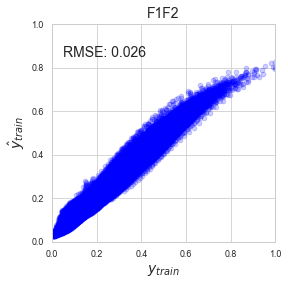

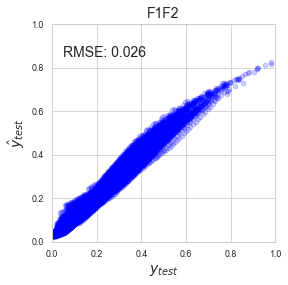

In [10]:
#predict Y from X
def predict_by_batch(Nb, N, model, X, timestep=60):
    y_hat = []
    for i in range(int(N/Nb)):
        _ = model.predict(X[i*Nb: i*Nb + Nb])
        y_hat.append(_)
    y_hat = np.reshape(np.array(y_hat), (-1, timestep, 3))
    return y_hat

y_train_hat_f1f2 = predict_by_batch(Nb=10, N=640, model=model.F1F2, X=x_train, timestep=60)
y_test_hat_f1f2 = predict_by_batch(Nb=10, N=160, model=model.F1F2, X=x_test, timestep=60)

print(y_train_hat_f1f2.shape, y_test_hat_f1f2.shape)

util.scatterPlot(y_masked_train.flatten(), y_train_hat_f1f2.flatten(), '$y_{train}$', '$\hat{y}_{train}$', 'b', 'F1F2', ylim=1, name="readme/sim_f1f2_train_emp-geo")
util.scatterPlot(y_masked_test.flatten(), y_test_hat_f1f2.flatten(), '$y_{test}$', '$\hat{y}_{test}$', 'b', 'F1F2', ylim=1, name="readme/sim_f1f2_test_emp-geo")

In [11]:
#predict P from X
def x2p_predict_by_batch(Nb, N, model, X, p_shape=3):
    p = []
    for i in range(int(N/Nb)):
        _ = model.predict(X[i*Nb: i*Nb + Nb])
        p.append(_)
    p = np.reshape(np.array(p), (-1, p_shape))
    return p

p_train_oil = x2p_predict_by_batch(Nb=10, N=640, model=model.X2P_oil, X=x_train, p_shape=3)
p_test_oil = x2p_predict_by_batch(Nb=10, N=160, model=model.X2P_oil, X=x_test, p_shape=3)

print(p_train_oil.shape, p_test_oil.shape)

p_train_water = x2p_predict_by_batch(Nb=10, N=640, model=model.X2P_water, X=x_train, p_shape=3)
p_test_water = x2p_predict_by_batch(Nb=10, N=160, model=model.X2P_water, X=x_test, p_shape=3)

print(p_train_water.shape, p_test_water.shape)

p_train_gas = x2p_predict_by_batch(Nb=10, N=640, model=model.X2P_gas, X=x_train, p_shape=3)
p_test_gas = x2p_predict_by_batch(Nb=10, N=160, model=model.X2P_gas, X=x_test, p_shape=3)

print(p_train_gas.shape, p_test_gas.shape)

#concatenate the parameters
p_train = np.concatenate((np.expand_dims(p_train_oil, axis=-1), np.expand_dims(p_train_water, axis=-1), np.expand_dims(p_train_gas, axis=-1)), axis=2)
p_test = np.concatenate((np.expand_dims(p_test_oil, axis=-1), np.expand_dims(p_test_water, axis=-1), np.expand_dims(p_test_gas, axis=-1)), axis=2)

print(p_train.shape, p_test.shape)

(640, 3) (160, 3)
(640, 3) (160, 3)
(640, 3) (160, 3)
(640, 3, 3) (160, 3, 3)


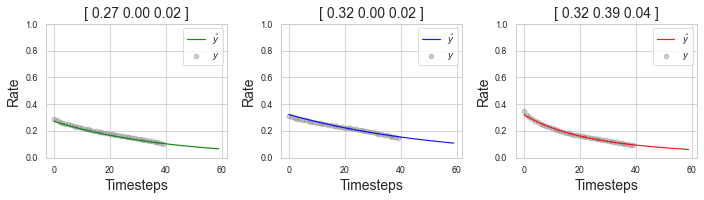

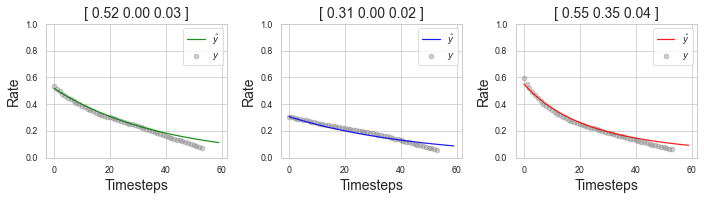

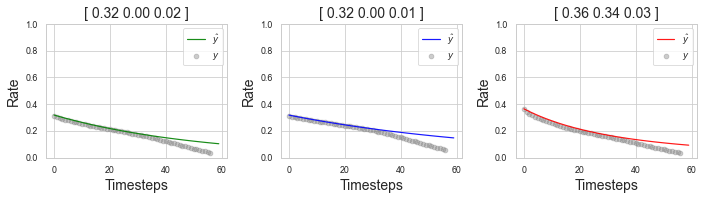

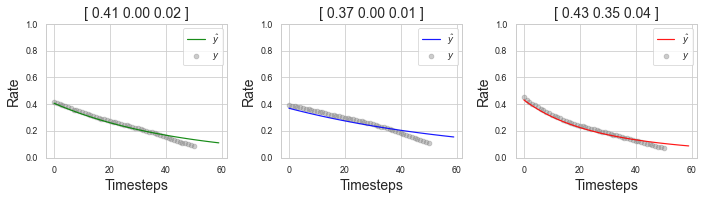

In [12]:
#plot sample #20
#for c in [20, 21, 237]:
for c in range(0, 4):
    util.plot_Y(y_masked_train, y_train_hat_f1f2, p_train, case=c, name="sim-y-yhat-geo")

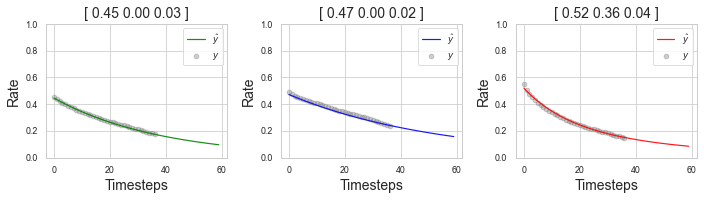

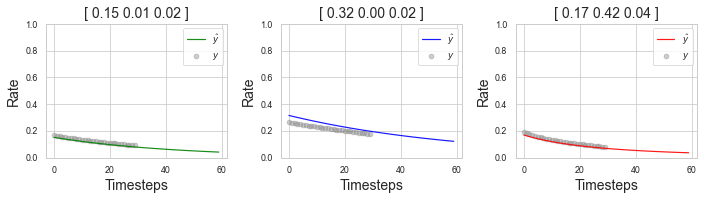

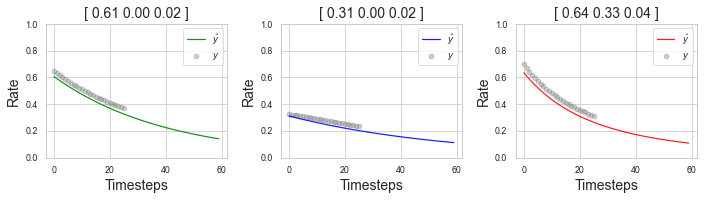

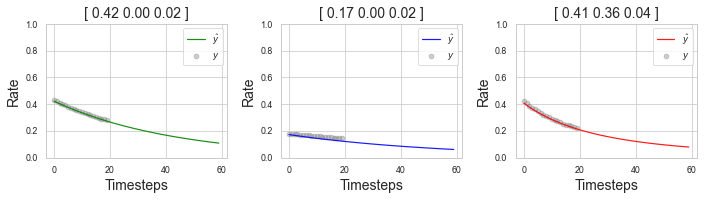

In [13]:
#plot sample
for c in range(0, 4):
    util.plot_Y(y_masked_test, y_test_hat_f1f2, p_test, case=c, name="sim-y-yhat-geo")